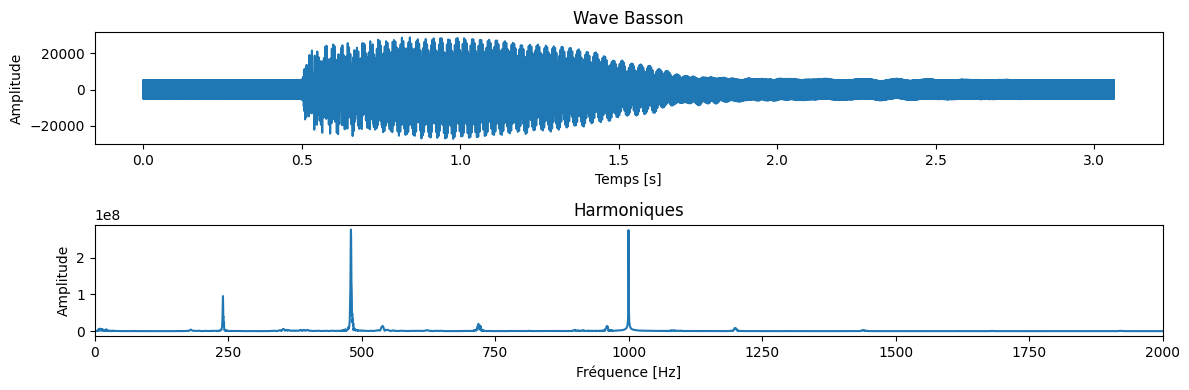

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile


Fe, data = wavfile.read("note_basson_plus_sinus_1000_hz.wav")

time = np.arange(len(data)) / Fe

fft = np.fft.rfft(data)
freqs_og = np.fft.rfftfreq(len(data), d=1 / Fe)
amplitude_og = np.abs(fft)

plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.title("Wave Basson")
plt.plot(time, data)
plt.xlabel("Temps [s]")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.title("Harmoniques")
plt.plot(freqs_og, amplitude_og)
plt.xlim((0,2000))
plt.xlabel("Fréquence [Hz]")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


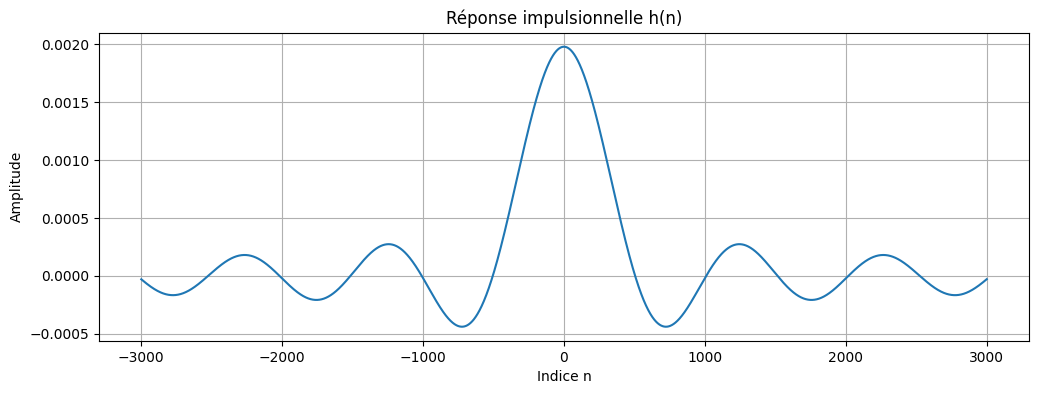

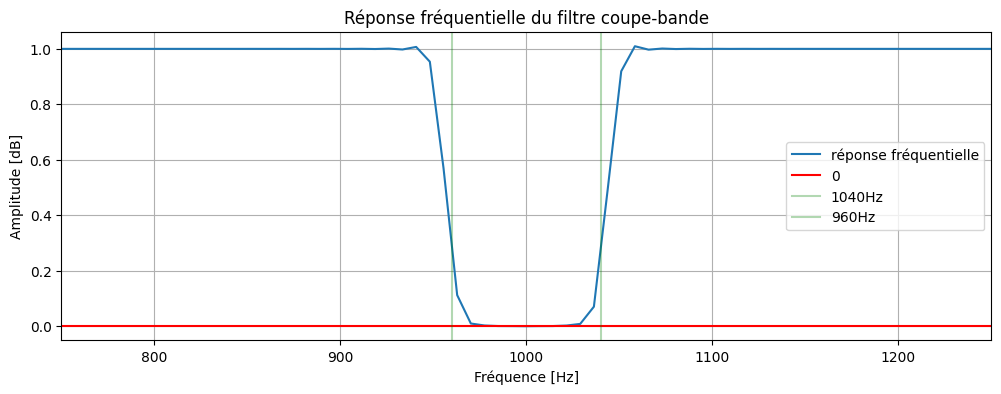

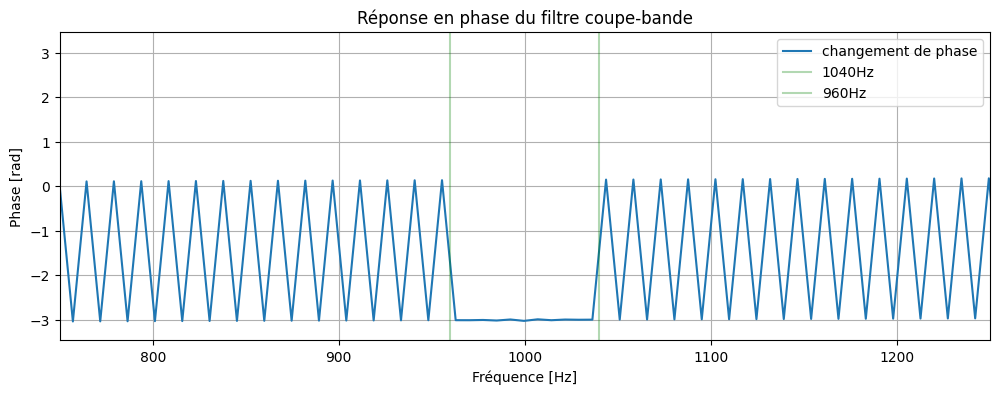

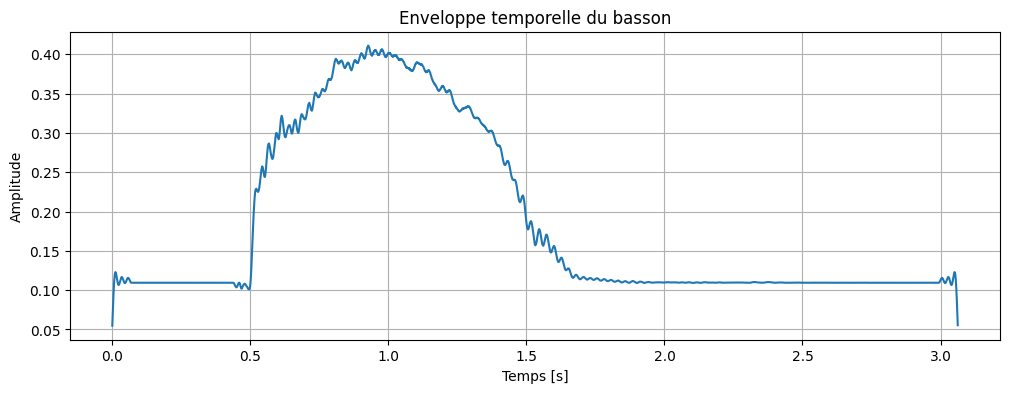

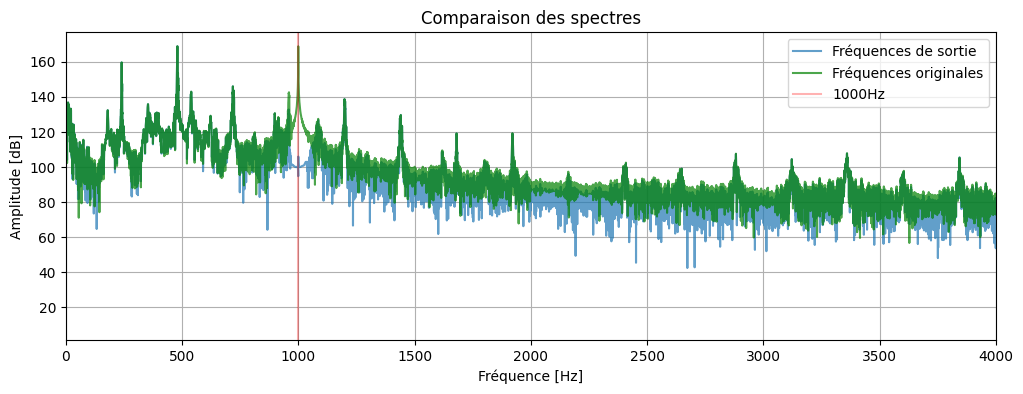

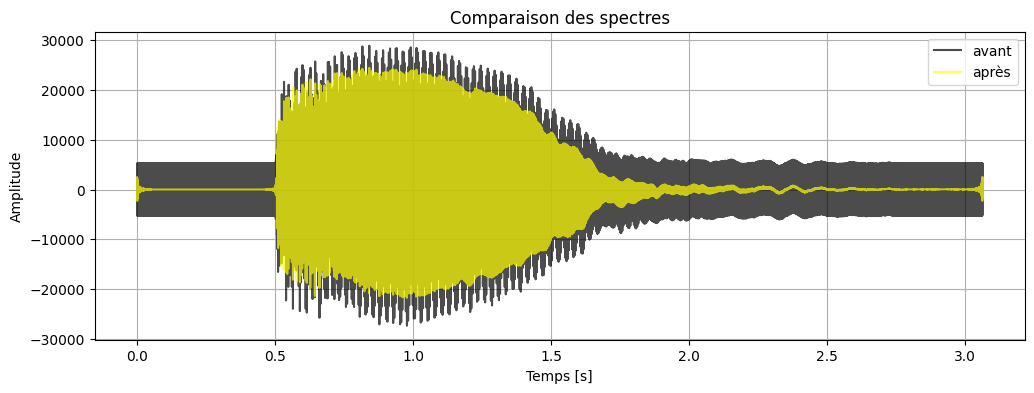

In [2]:
N = 6000
Fc = 40
w0 = 1000 * 2 * np.pi / Fe

n = np.linspace(-(N - 1) / 2, (N - 1) / 2 + 1, N)

k = (2 * N * Fc / Fe) + 1
h = np.sin(np.pi * n * k / N) / (N * np.sin(np.pi * n / N))

redressed_data = abs(data) / max(abs(data))
enveloppe = np.abs(np.convolve(redressed_data, h, mode="same"))

dirac = np.zeros(N)
dirac[N//2 - 1] = 1

filtre = dirac - (2 * h * np.cos(w0 * n)) * np.hanning(len(n))

freqs = np.fft.rfftfreq(len(filtre), 1 / Fe)
amplitude = np.abs(np.fft.rfft(filtre))
angles = np.angle(np.fft.rfft(filtre))

signal = np.convolve(data, filtre, mode="same")

plt.figure(figsize=(12, 4))
plt.title("Réponse impulsionnelle h(n)")
plt.plot(n, h)
plt.xlabel("Indice n")
plt.ylabel("Amplitude")
plt.grid(True)
plt.savefig("./images/reponse-h-basson.jpg")

plt.figure(figsize=(12, 4))
plt.title("Réponse fréquentielle du filtre coupe-bande")
plt.plot(freqs, amplitude, label="réponse fréquentielle")
plt.axhline(0, color="red", label="0")
plt.axvline(1040,alpha=0.3, color="green", label="1040Hz")
plt.axvline(960,alpha=0.3, color="green", label="960Hz")
plt.xlim((750,1250))
plt.xlabel("Fréquence [Hz]")
plt.ylabel("Amplitude [dB]")
plt.legend()
plt.grid(True)
plt.savefig("./images/filtre-freq-amp-basson.jpg")

plt.figure(figsize=(12, 4))
plt.title("Réponse en phase du filtre coupe-bande")
plt.plot(freqs, angles, label="changement de phase")
plt.axvline(1040,alpha=0.3, color="green", label="1040Hz")
plt.axvline(960,alpha=0.3, color="green", label="960Hz")
plt.xlim((750,1250))
plt.xlabel("Fréquence [Hz]")
plt.ylabel("Phase [rad]")
plt.legend()
plt.grid(True)
plt.savefig("./images/filtre-freq-phase-basson.jpg")

plt.figure(figsize=(12, 4))
plt.title("Enveloppe temporelle du basson")
plt.plot(time, enveloppe)
plt.xlabel("Temps [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.savefig("./images/enveloppe-basson.jpg")

fft = np.fft.rfft(signal)
freqs = np.fft.rfftfreq(len(signal), d=1 / Fe)
amplitude = np.abs(fft)

plt.figure(figsize=(12, 4))
plt.title("Comparaison des spectres")
plt.plot(freqs, 20 * np.log10(amplitude), alpha=0.7, label="Fréquences de sortie")
plt.plot(freqs_og, 20 * np.log10(amplitude_og), alpha=0.7, label="Fréquences originales", color="green")
plt.axvline(1000, label="1000Hz",alpha=0.3, color="red")
plt.grid(True)
plt.xlim((0,4000))
plt.xlabel("Fréquence [Hz]")
plt.ylabel("Amplitude [dB]")
plt.legend()
plt.savefig("./images/comparaison-spectre-basson.jpg")
plt.show()

plt.figure(figsize=(12, 4))
plt.title("Comparaison des spectres")
plt.plot(time, data, alpha=0.7, label="avant", color="black")
plt.plot(time, signal, alpha=0.7, label="après", color="yellow")
plt.grid(True)
plt.xlabel("Temps [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

max_value = np.max(np.abs(signal))
signal = signal / max_value
signal_export = np.int16(signal * 32767)
wavfile.write("basson_out.wav", Fe, signal_export)

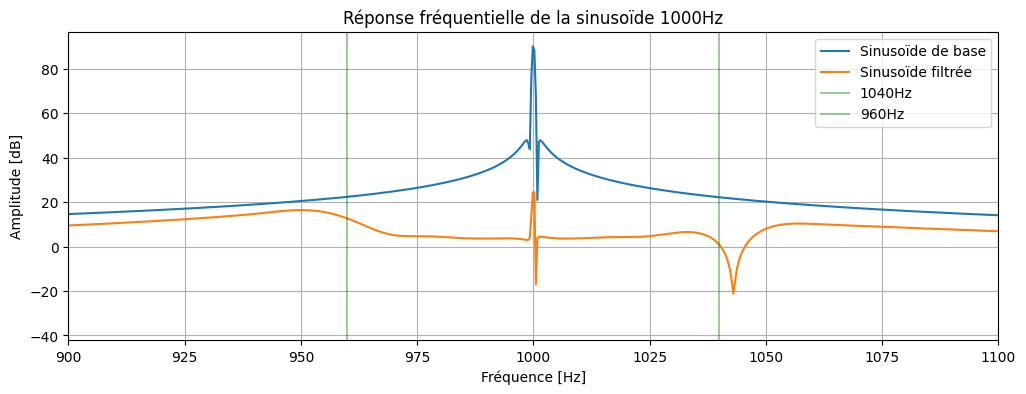

In [3]:
sin1000 = np.ones(len(time)) * np.sin(2 * np.pi * 1000 * time)
sin1000 = np.hamming(len(sin1000)) * sin1000

amplitude1000 = np.abs(np.fft.rfft(sin1000))
xsin1000 = np.fft.rfftfreq(len(sin1000), 1 / Fe)

filtered1000 = np.convolve(sin1000, filtre, mode="same")
ampfiltered1000 = np.abs(np.fft.rfft(filtered1000))


plt.figure(figsize=(12, 4))
plt.title("Réponse fréquentielle de la sinusoïde 1000Hz")
plt.plot(xsin1000, 20 * np.log10(amplitude1000), label="Sinusoïde de base")
plt.plot(xsin1000, 20 * np.log10(ampfiltered1000), label="Sinusoïde filtrée")
plt.axvline(1040,alpha=0.4, color="green", label="1040Hz")
plt.axvline(960,alpha=0.4, color="green", label="960Hz")
plt.xlabel("Fréquence [Hz]")
plt.ylabel("Amplitude [dB]")
plt.xlim((900,1100))
plt.legend()
plt.grid(True)
plt.savefig("./images/reponse-sin-basson.jpg")